Testing dataset quality Bag-of-Words with Multinomial Naive Bayes

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import random

In [2]:
data = pd.read_csv('finance_data.csv')

# Printing dataset
data.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [3]:
print(data.shape)
print(data.Sentiment.value_counts())

(5842, 2)
neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64


In [4]:
#Removing samples with neutral labels
data = data[data.Sentiment != "neutral"]

In [5]:
#Undersampling data
pos_count, neg_count = data['Sentiment'].value_counts()

pos_data = data[data['Sentiment'] == 'positive']
neg_data = data[data['Sentiment'] == 'negative']

pos_under = pos_data.sample(neg_count)
data = pd.concat([pos_under, neg_data], axis=0)

data.Sentiment.value_counts()

positive    860
negative    860
Name: Sentiment, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size = 0.20, random_state = 42)

In [7]:
## Sentiment Distrubtion for Train and Test
from collections import Counter

print("Distribution for training:\n", train.Sentiment.value_counts())
print("Distribution for testing:\n", test.Sentiment.value_counts())

Distribution for training:
 negative    695
positive    681
Name: Sentiment, dtype: int64
Distribution for testing:
 positive    179
negative    165
Name: Sentiment, dtype: int64


In [8]:
x_train = train['Sentence']
x_test = test['Sentence']
y_train = train['Sentiment']
y_test = test['Sentiment']

In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

tfidf_vec = TfidfVectorizer(lowercase = True, stop_words = 'english', ngram_range = (1, 1), min_df = 1, token_pattern = r'[a-zA-Z]+')
x_train_bow = tfidf_vec.fit_transform(x_train) # fit train
x_test_bow = tfidf_vec.transform(x_test) # transform test

In [10]:
from sklearn.naive_bayes import MultinomialNB

model_mnb = MultinomialNB()
history = model_mnb.fit(x_train_bow, y_train)

In [11]:
from sklearn.model_selection import cross_val_score

model_gnb_acc = cross_val_score(estimator = model_mnb, X = x_train_bow, y = y_train, cv = 5, n_jobs = -1)

model_gnb_acc

array([0.74637681, 0.79272727, 0.76      , 0.72      , 0.73454545])

Evaluation

In [12]:
# Accuracy
y_pred = model_mnb.predict(x_test_bow)

print(model_mnb.score(x_test_bow, y_test))

0.7936046511627907


In [13]:
#F1
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, 
         average=None, 
         labels = data.Sentiment.unique())

array([0.78931751, 0.7977208 ])

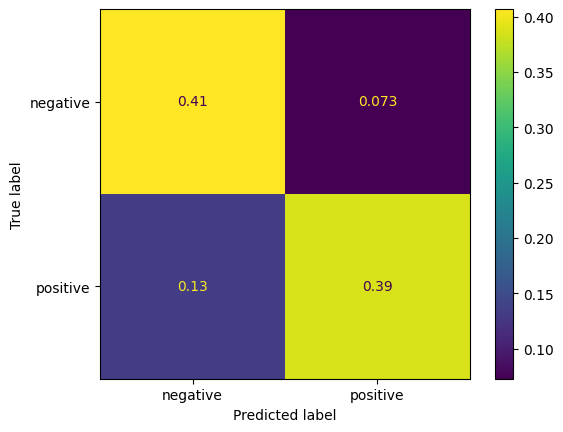

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

bi_labels = ['negative', 'positive']
#mu_labels = ['negatve', 'neutral', 'positive']

cm = confusion_matrix(y_test, y_pred, normalize = 'all') 

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = bi_labels)

disp.plot()
plt.show()